In [634]:
# Import convention
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [635]:
df = pd.read_csv('customers.csv')


In [636]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [637]:
# Remove unnecessary columns
df=df.drop(['Var_1'],axis=1)

## Replacing Nulls

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 184.8+ KB


In [639]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
dtype: int64

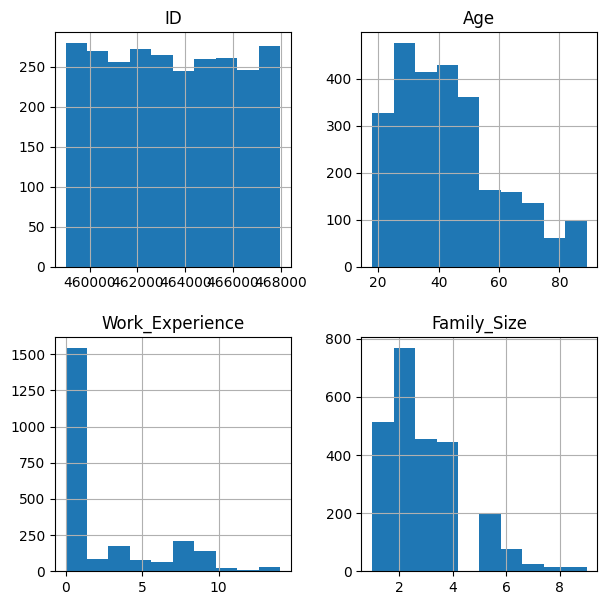

In [640]:
df.hist(bins= 10, figsize= (7,7))
plt.show()

### *Work Experience*

In [641]:
df['Profession'].isnull().sum()

38

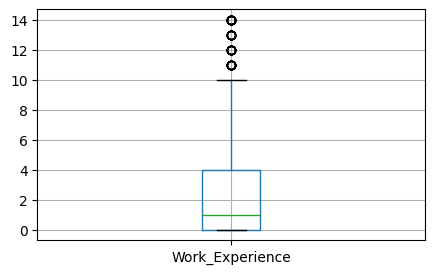

In [642]:
df.boxplot(column = 'Work_Experience', figsize=(5,3))
plt.show()

In [643]:
df['Work_Experience'] = df['Work_Experience'].fillna(method='pad') ## it fills NA/NaN values using the ffill() method.


### *Family Size*

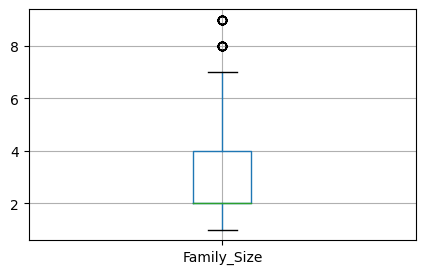

In [644]:
df.boxplot(column = 'Family_Size', figsize=(5,3))
plt.show()

In [645]:
df['Family_Size'] = df['Family_Size'].fillna(method='pad')


### *Ever Married*

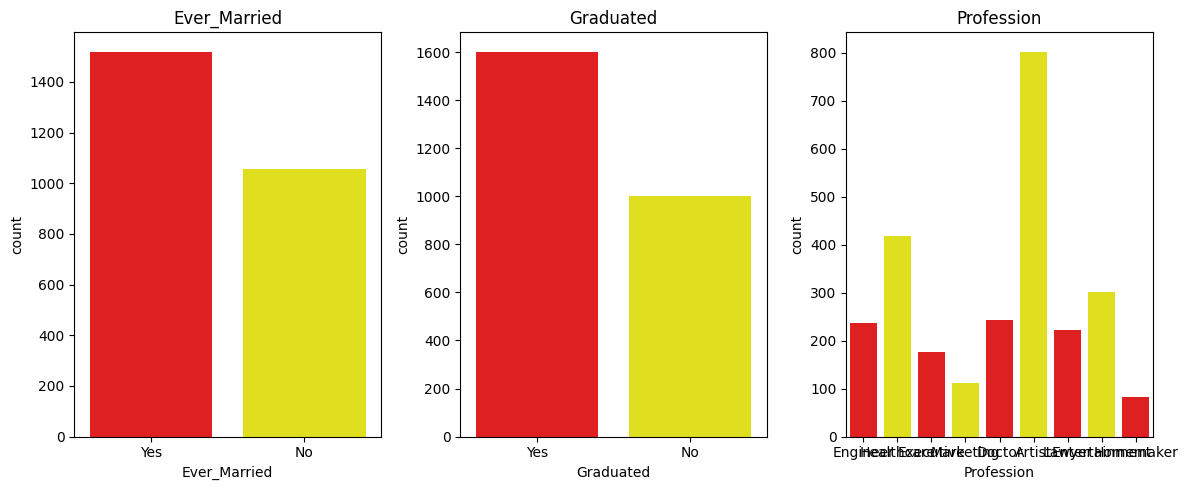

In [646]:
columns_obj = ['Ever_Married','Graduated','Profession']
plt.figure(figsize=(12,5))

for i,a in enumerate(list(columns_obj)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(data=df, x=df[a],palette=["red","yellow"])
    plt.title(a)

plt.tight_layout()
plt.show()

### `Replacing values`

In [647]:
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].value_counts().idxmax())
df['Graduated'] = df['Graduated'].fillna(df['Graduated'].value_counts().idxmax())
df['Profession'] = df['Profession'].fillna(df['Profession'].value_counts().idxmax())

In [648]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

## Exploratory Data Analysis

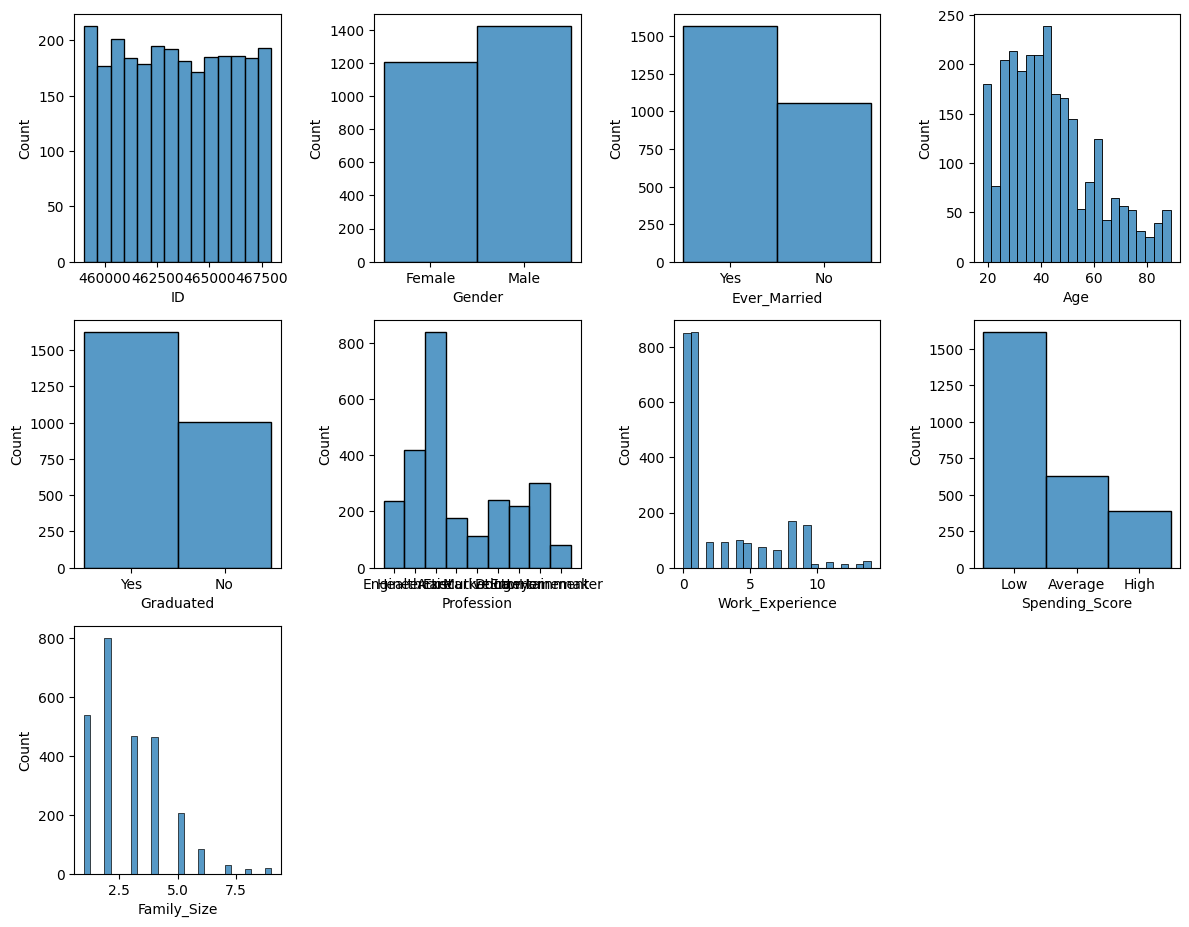

In [649]:
plt.figure(figsize=(12,12))
for i,c in enumerate(df.columns):
    plt.subplot(4,4, i+1)
    sns.histplot(df[c])
    plt.xlabel(c)
    plt.tight_layout()
plt.show()

In [650]:
df.groupby(['Graduated'])['Age'].mean('mean').to_frame().reset_index()

,Graduated,Age
0,No,38.644356
1,Yes,46.731242


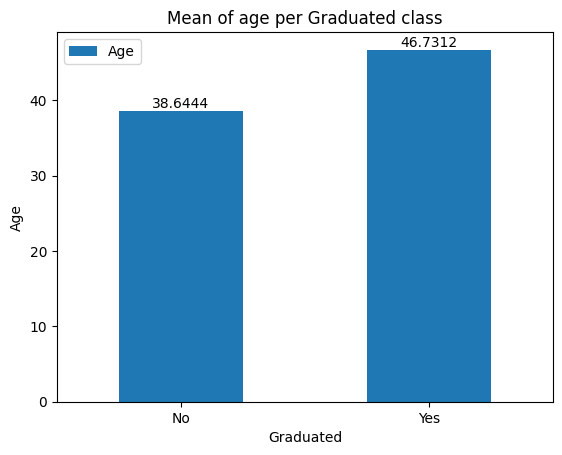

In [651]:
#plt.figure(figsize=(10,10))
ax = df.groupby(['Graduated'])['Age'].mean().to_frame().plot(kind='bar', rot=0, title='Mean of age per Graduated class', ylabel='Age' )
ax.bar_label(ax.containers[0])
plt.show()


## **Encoding**

In [652]:
# First, drop ID column (meaningless)
df = df.drop(columns='ID')

In [653]:
cat_features = [col for col in df.columns if df[col].dtype == 'object' ]

In [654]:
cat_features

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

In [655]:
encoder = OrdinalEncoder()
df[cat_features] = encoder.fit_transform(df[cat_features])


In [656]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0.0,1.0,36,1.0,2.0,0.0,2.0,1.0
1,1.0,1.0,37,1.0,5.0,8.0,0.0,4.0
2,0.0,1.0,69,0.0,0.0,0.0,2.0,1.0
3,1.0,1.0,59,0.0,4.0,11.0,1.0,2.0
4,0.0,0.0,19,0.0,8.0,11.0,2.0,4.0
...,...,...,...,...,...,...,...,...
2622,1.0,0.0,29,0.0,5.0,9.0,2.0,4.0
2623,0.0,0.0,35,1.0,1.0,1.0,2.0,1.0
2624,0.0,0.0,53,1.0,3.0,1.0,2.0,2.0
2625,1.0,1.0,47,1.0,4.0,1.0,1.0,5.0


## Finding Better cluster

In [657]:
max_clusters = 10
kmeans = [KMeans(n_clusters = i) for i in range(1, max_clusters)]


In [658]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [659]:
inertias = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]
inertias

[813462.5123715266,
 299290.7271511655,
 161896.2798700002,
 114195.50436293149,
 90957.87907623033,
 77288.93555508464,
 67391.92121496068,
 59108.12702114,
 51872.06654731686]

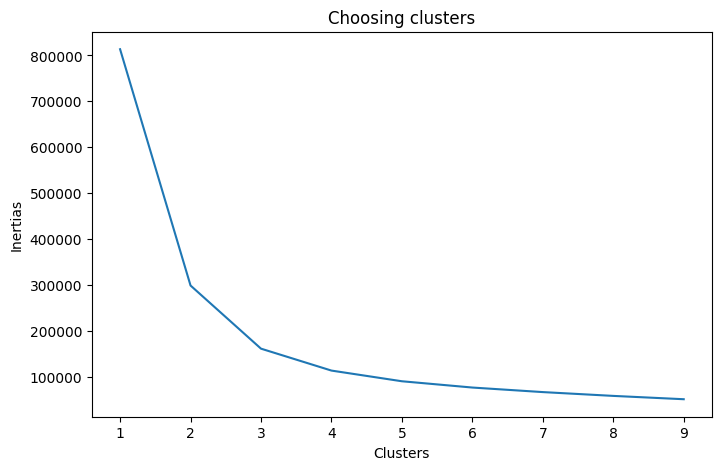

In [660]:
plt.figure(figsize = (8,5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.title('Choosing clusters')
plt.show()

In [661]:

kmeans = KMeans(n_clusters=3, n_init=15)
kmeans.fit(df)
print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ", kmeans.cluster_centers_)
print("Cluster assignments ", kmeans.labels_)



WCSS:  161898.76164548064
Iternations until converged:  9
Final centroids:  [[ 0.53641732  0.25       27.74015748  0.43799213  3.39074803  3.13976378
   1.78051181  3.31299213]
 [ 0.53125     0.75       45.4375      0.75919118  1.69669118  2.63970588
   1.10018382  2.65992647]
 [ 0.57552581  0.95602294 70.8374761   0.67877629  3.91395793  1.42256214
   1.17017208  2.2581262 ]]
Cluster assignments  [0 1 2 ... 1 1 1]


In [662]:
km_pred = kmeans.predict(df)

In [663]:
df['Cluster'] = km_pred

In [664]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster
0,0.0,1.0,36,1.0,2.0,0.0,2.0,1.0,0
1,1.0,1.0,37,1.0,5.0,8.0,0.0,4.0,1
2,0.0,1.0,69,0.0,0.0,0.0,2.0,1.0,2
3,1.0,1.0,59,0.0,4.0,11.0,1.0,2.0,2
4,0.0,0.0,19,0.0,8.0,11.0,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...
2622,1.0,0.0,29,0.0,5.0,9.0,2.0,4.0,0
2623,0.0,0.0,35,1.0,1.0,1.0,2.0,1.0,0
2624,0.0,0.0,53,1.0,3.0,1.0,2.0,2.0,1
2625,1.0,1.0,47,1.0,4.0,1.0,1.0,5.0,1


## Visualising clusters

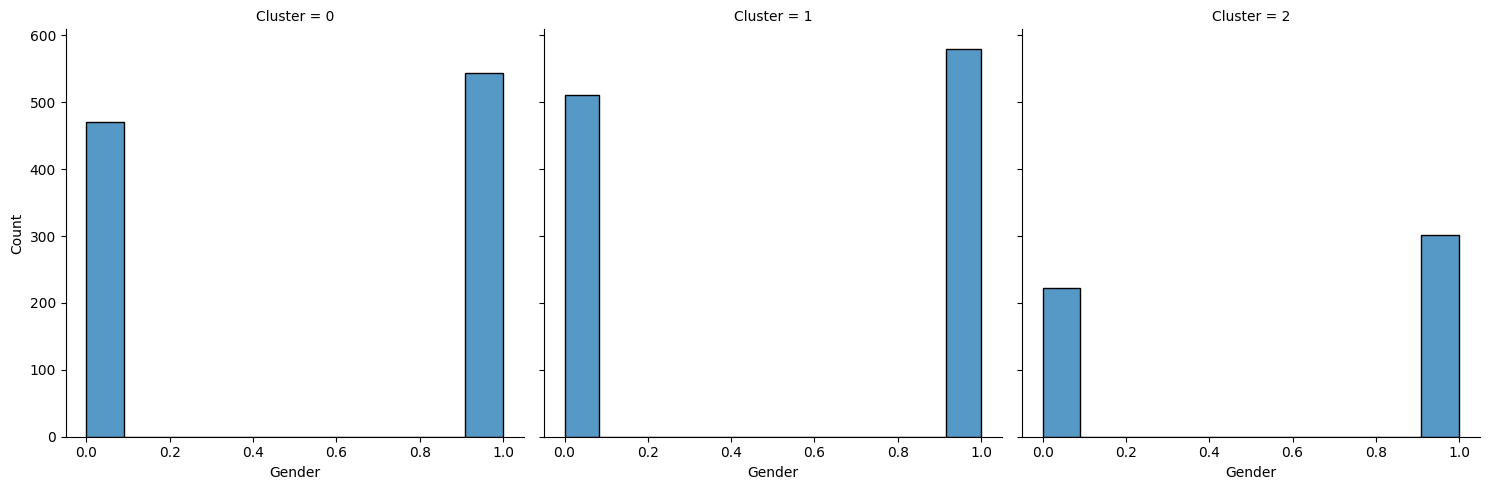

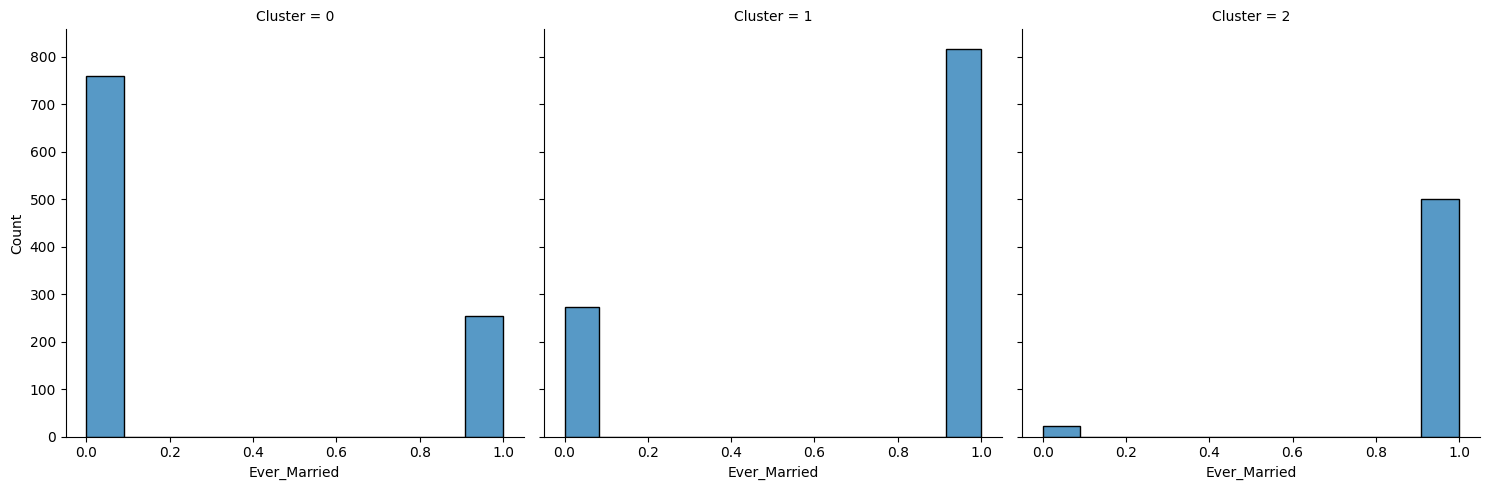

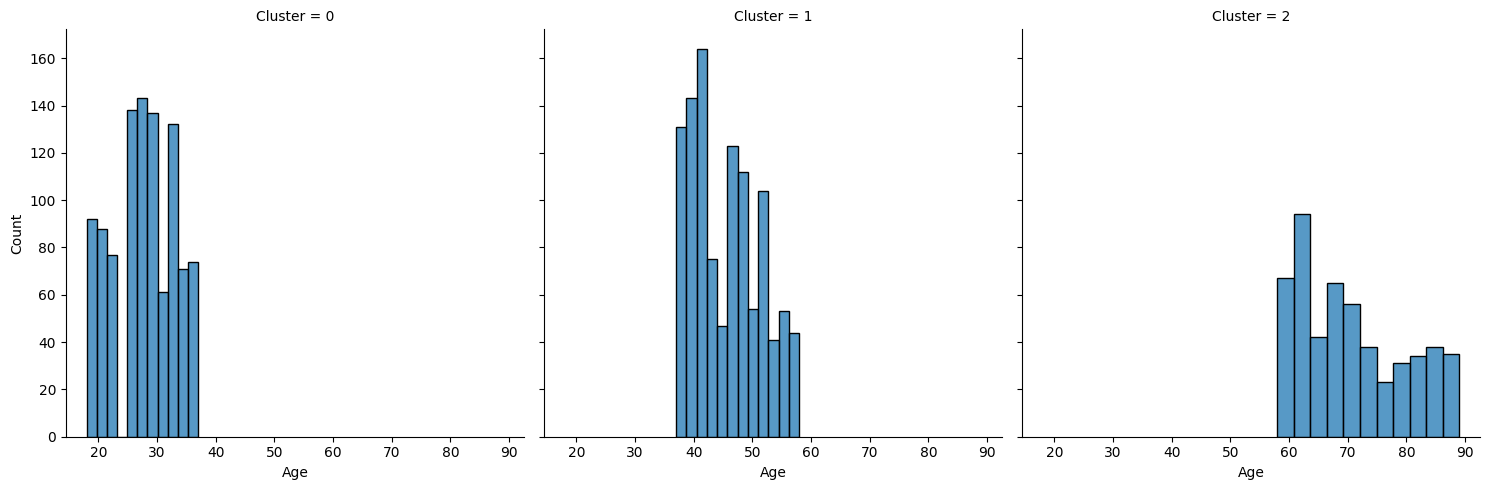

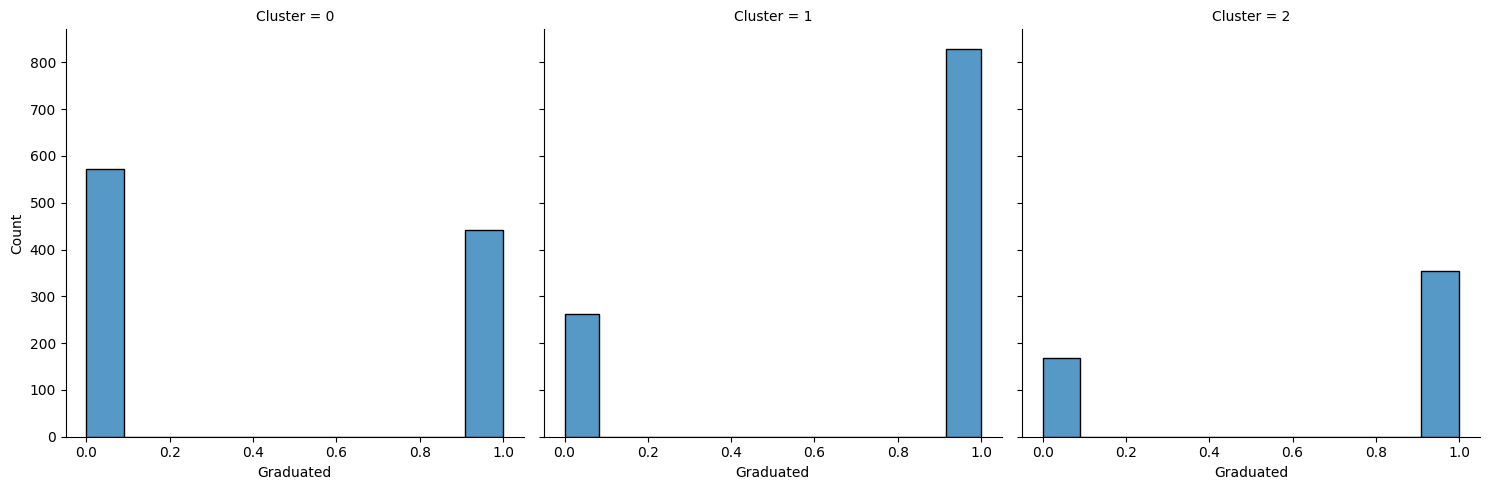

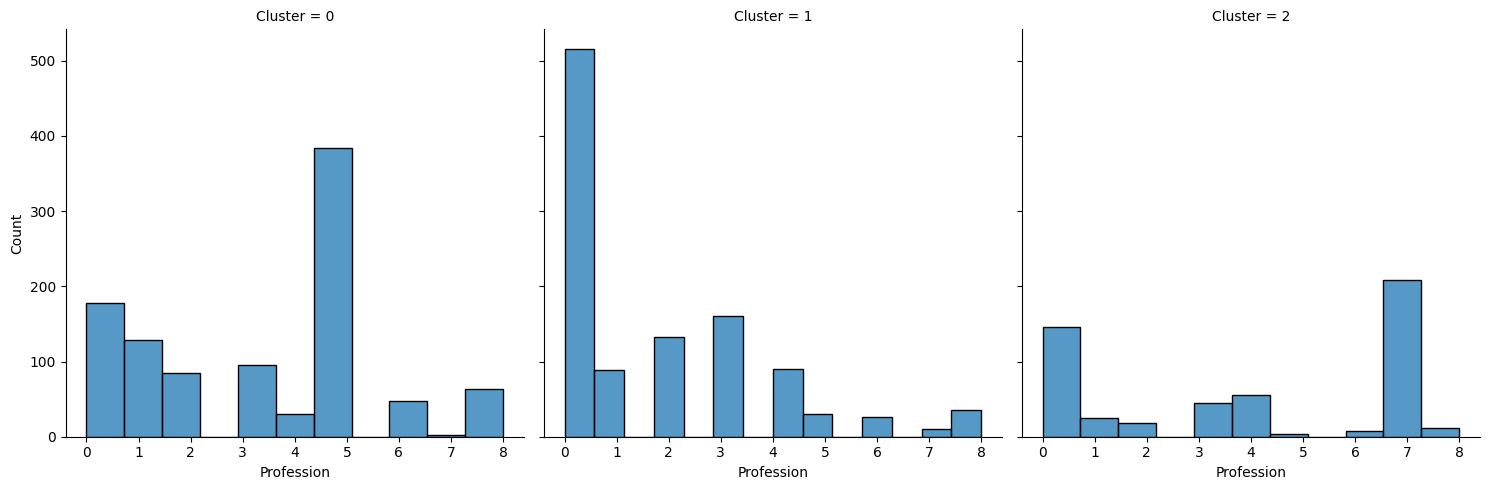

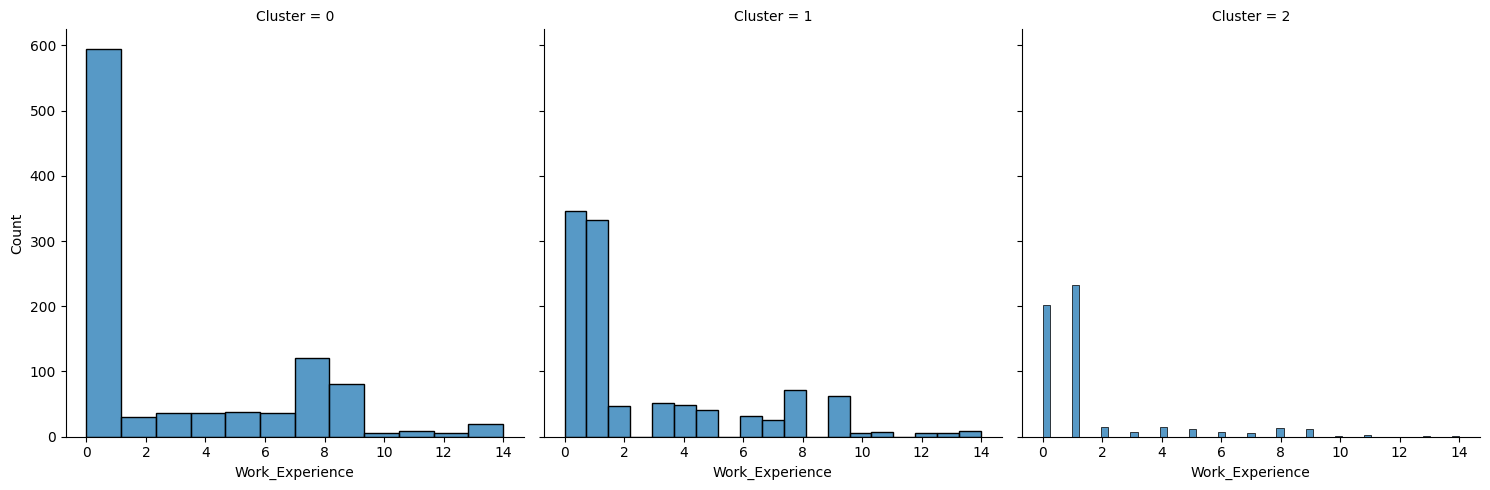

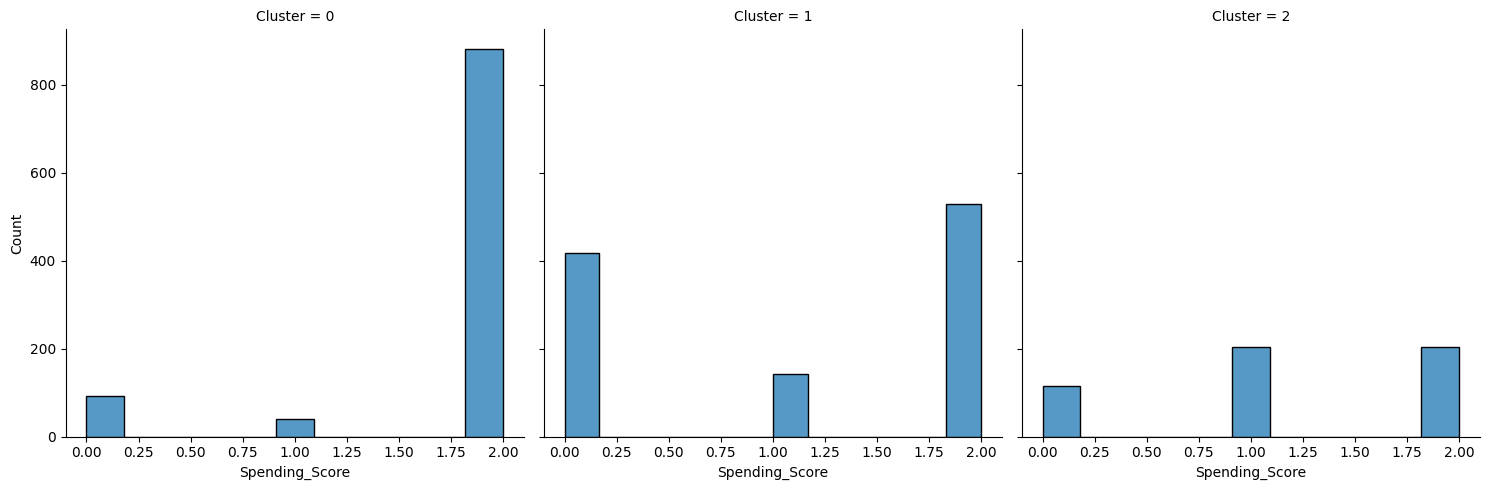

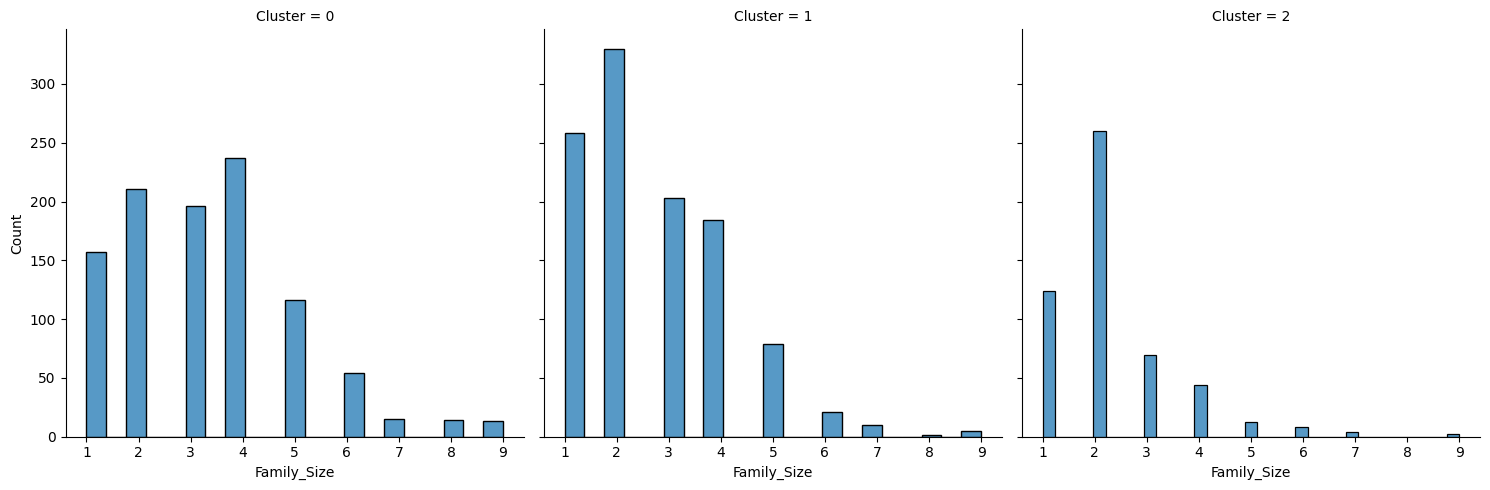

In [665]:
for i in df.drop('Cluster', axis = 1):
    g = sns.FacetGrid(df, col= 'Cluster', height=5, aspect= 1)
    g.map(sns.histplot, i)